In [3]:
#  import libraries 
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#  import the data 
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [5]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [7]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
insurance.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [9]:
#  make it in one hot encoded formate
one_hot = pd.get_dummies(insurance)

In [10]:
one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [11]:
#  Create X and y 
X = one_hot.drop("charges", axis = 1)
y = one_hot["charges"]

In [12]:
X.head()


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [13]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [14]:
# Create test and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 ) 

In [15]:
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [16]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0
1142,52,24.86,0,1,0,1,0,0,0,1,0
969,39,34.32,5,1,0,1,0,0,0,1,0
486,54,21.47,3,1,0,1,0,0,1,0,0


In [17]:
#  Build a neural network
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = tf.keras.metrics.mae)
insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 8637.1006 - mean_absolute_error: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.7759 - mean_absolute_error: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7558.1470 - mean_absolute_error: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7792.0225 - mean_absolute_error: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.3887 - mean_absolute_error: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7595.3940 - mean_absolute_error: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7589.9844 - mean_absolute_error: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.5576 - mean_absolute_error: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss:

In [18]:
#  Check the results of insurance_model on test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mean_absolute_error: 7023.3291


[7023.3291015625, 7023.3291015625]

To (try) improve our model :
1. Add extra layer with more hidden units and use Adam optimizer
2. Train for longer

In [19]:
# 1.
insurance_model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model2.compile(loss= tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(), # if we use SGD() we dont have enough data to teach the model so the mae is nan
                         metrics = ["mae"])

insurance_model2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13297.9463 - mae: 13297.9463
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13142.5186 - mae: 13142.5186
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12825.9102 - mae: 12825.9102
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12187.4023 - mae: 12187.4023
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11081.3428 - mae: 11081.3428
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9624.2451 - mae: 9624.2451
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8256.6221 - mae: 8256.6221
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7559.7549 - mae: 7559.7549
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7439.2817 - mae: 7439.2817
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7417.5854 - mae:

In [20]:
insurance_model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4852.5459 - mae: 4852.5459


[4852.5458984375, 4852.5458984375]

In [21]:
# model 3
tf.random.set_seed(42)
insurance_model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model3.compile(loss = ["mae"],
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ["mae"])
history = insurance_model3.fit(X_train , y_train, epochs = 500)


Epoch 1/500
34/34 [==============================] - 1s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [22]:
insurance_model3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3170.5703 - mae: 3170.5703


[3170.5703125, 3170.5703125]

In [23]:
history_data = pd.DataFrame(history.history)

In [24]:
history_data

,loss,mae
0,13273.160156,13273.160156
1,13104.429688,13104.429688
2,12749.541992,12749.541992
3,12055.750000,12055.750000
4,10905.815430,10905.815430
...,...,...
495,3475.798584,3475.798584
496,3484.583740,3484.583740
497,3486.732910,3486.732910
498,3475.276611,3475.276611


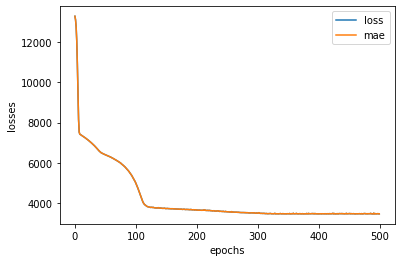

In [25]:
history_data.plot(xlabel = "epochs", ylabel = "losses")

In [26]:
#  Extra :: Preprocessing the data
#  Scale features ( Normalization and Standadization)

In [27]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


# Feature Scalling
1. Normalization
2. Standadization

in terms of scalling values neural network tend to use Normalization

In [28]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [32]:
#  To preprare our data we may need few classes from sklearn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#  Create a column Transformer:

ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # Turn all the numerical data carrying couln betwee o and 1
  (OneHotEncoder(handle_unknown="ignore"), ['sex', 'smoker', 'region'])
)

X = insurance.drop('charges', axis =1)
y = insurance['charges']
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# fitting the colum transformer to our training data
ct.fit(X_train)

#  transformer= training and test data with the normalization(MinMaxscalar) and one hot encoder
X_train_normal = ct.transform(X_train)
X_test_normal  = ct.transform(X_test)

In [34]:
# What doesour dat a look like now
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [36]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [37]:
# Our data has been normalized and one hot encoded Now we have to build the model
tf.random.set_seed(42)
insurance_model4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model4.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ['mae'])

insurance_model4.fit(X_train_normal, y_train , epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 11925.96

In [38]:
insurance_model4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]